<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.Coursera_ML_AI/blob/main/AIN501_AssignmentEnd5.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dự Báo Giá Bất Động Sản Tại Các Quận Thuộc Thành Phố Hồ Chí Minh

Bộ dữ liệu được chuẩn bị có nguồn gốc là dữ liệu thẩm định giá tại một công ty thẩm định tại Việt Nam. Dữ liệu định giá được dùng cho mục đích vay vốn tại các ngân hàng.


## Danh Mục
- [1 - Chuẩn bị dữ liệu](#1)
- [2 - Chuẩn hóa dữ liệu](#2)
- [3 - Lựa chọn dữ liệu cần cho việc training model](#3)
- [4 - Phân chia các tập dữ liệu](#4)
- [5 - Sử dụng LSTM để train](#5)
- [6 - Kết Luận](#6)



In [1]:
# thêm các thư viện cơ bản
import os
import pandas as pd
import numpy as np
### Clear Warning
import warnings; 
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import cufflinks as cf
pd.options.display.float_format = '{:.2f}'.format

<a name='1'></a>
## 1 - Chuẩn bị dữ liệu

In [2]:
# lấy dữ liệu từ link github
dataf = pd.read_csv('https://raw.githubusercontent.com/nguyenvudev20/mse22.Coursera_ML_AI/main/data_nhapho.csv')

In [3]:
dataf.head()

,id,quanhuyen,tinhtp,toado,chieudongmt,vitri,duongtruocnha,huongnha,hinhdang,mongnha,...,trannha,sannha,cuachinh,cuaphong,cuaso,dt_dato,dt_datkhac,dt_xaydung,ngaylap,giatri
0,11061,Quận 12,Hồ Chí Minh,"10.8716369,106.6399459",4m,NaN,8m (lề mỗi bên 2m),Hướng Đông Bắc,"[Vuông vức, ]","[Móng BTCT, ]",...,"[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa nhôm kính, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",52.00,0.00,201.30,2021-10-07 10:22:35.850,3830519632.00
1,11061,Quận 12,Hồ Chí Minh,NaN,4m,NaN,8m (gồm mỗi lề 2m),Hướng Đông Bắc,"[Vuông vức, ]","[Móng BTCT, ]",...,"[Trần thạch cao, đèn âm trần, ]",ốp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",52.00,0.00,201.30,2021-10-07 10:22:35.850,3830519632.00
2,11061,Quận 12,Hồ Chí Minh,"10.871637, 106.639946",4m,NaN,8m (gồm mỗi lề 2m),Hướng Đông Bắc,"[Vuông vức, ]","[Móng BTCT, ]",...,"[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",52.00,0.00,201.30,2021-10-07 10:22:35.850,3830519632.00
3,11077,Quận 7,Hồ Chí Minh,NaN,"2,4",NaN,"10M ĐƯỜNG 77, HẺM HÔNG 3M",Hướng Nam,"[Vuông vức, ]",[],...,"[Trần thạch cao, đèn âm trần, ]",không chừa sân,"[Cửa sắt cuốn tự động, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",13.91,0.99,14.90,2021-06-11 14:52:08.060,3297234741.00
4,11101,Quận Tân Bình,Hồ Chí Minh,NaN,"4,21m",NaN,7m,Hướng Đông Nam,[Chữ L],"[Móng BTCT, ]",...,[la phông],không chừa sân,"[Cửa sắt, Khác]",[sắt kính],"[Cửa sắt, Khác]",539.00,0.00,504.10,2021-12-16 11:41:43.793,43150189867.00


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1124 non-null   int64  
 1   quanhuyen      1124 non-null   object 
 2   tinhtp         1124 non-null   object 
 3   toado          1037 non-null   object 
 4   chieudongmt    1070 non-null   object 
 5   vitri          205 non-null    object 
 6   duongtruocnha  1068 non-null   object 
 7   huongnha       1032 non-null   object 
 8   hinhdang       1104 non-null   object 
 9   mongnha        1102 non-null   object 
 10  congnha        804 non-null    object 
 11  tuongnha       917 non-null    object 
 12  trannha        1103 non-null   object 
 13  sannha         1094 non-null   object 
 14  cuachinh       1104 non-null   object 
 15  cuaphong       1104 non-null   object 
 16  cuaso          1104 non-null   object 
 17  dt_dato        1124 non-null   float64
 18  dt_datkh

In [5]:
dataf.shape

(1124, 22)

In [6]:
dataf.columns

Index(['id', 'quanhuyen', 'tinhtp', 'toado', 'chieudongmt', 'vitri',
       'duongtruocnha', 'huongnha', 'hinhdang', 'mongnha', 'congnha',
       'tuongnha', 'trannha', 'sannha', 'cuachinh', 'cuaphong', 'cuaso',
       'dt_dato', 'dt_datkhac', 'dt_xaydung', 'ngaylap', 'giatri'],
      dtype='object')

<a name='2'></a>
## 2 - Chuẩn hóa dữ liệu

In [7]:
# lựa chọn các cột cần thiết
features = [ 'ngaylap','quanhuyen','vitri', 'huongnha','hinhdang','chieudongmt', 
            'mongnha', 'congnha','tuongnha', 'trannha', 'sannha', 'cuachinh', 'cuaphong', 'cuaso',
             'giatri']
data=dataf[features]
data.head()

,ngaylap,quanhuyen,vitri,huongnha,hinhdang,chieudongmt,mongnha,congnha,tuongnha,trannha,sannha,cuachinh,cuaphong,cuaso,giatri
0,2021-10-07 10:22:35.850,Quận 12,NaN,Hướng Đông Bắc,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa nhôm kính, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
1,2021-10-07 10:22:35.850,Quận 12,NaN,Hướng Đông Bắc,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ốp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
2,2021-10-07 10:22:35.850,Quận 12,NaN,Hướng Đông Bắc,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
3,2021-06-11 14:52:08.060,Quận 7,NaN,Hướng Nam,"[Vuông vức, ]","2,4",[],Không,"Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",không chừa sân,"[Cửa sắt cuốn tự động, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3297234741.00
4,2021-12-16 11:41:43.793,Quận Tân Bình,NaN,Hướng Đông Nam,[Chữ L],"4,21m","[Móng BTCT, ]",Cổng sắt kéo tự động,"Tường xây gạch 110 bổ trụ BTCT, sơn nước",[la phông],không chừa sân,"[Cửa sắt, Khác]",[sắt kính],"[Cửa sắt, Khác]",43150189867.00


In [8]:
# xử lý duplicate
data=data.drop_duplicates()
data[data.duplicated()]

,ngaylap,quanhuyen,vitri,huongnha,hinhdang,chieudongmt,mongnha,congnha,tuongnha,trannha,sannha,cuachinh,cuaphong,cuaso,giatri


In [9]:
from sklearn.preprocessing import LabelEncoder
# chuẩn hóa cột ngaylap
data['ngaylap'] = pd.to_datetime(data['ngaylap']).dt.date
le = LabelEncoder()
data['ngaylap'] = le.fit_transform(data['ngaylap'])

In [10]:
# chuẩn hóa dữ liệu cột quanhuyen
qh_stt =[1, 19, 3,4,5,6,7,8,19,10,11,12,13,14,15,16,17,19,19,20,21,22,23,24,25]
qh_name=['Quận 1', 'Quận 2','Quận 3','Quận 4','Quận 5', 'Quận 6', 'Quận 7','Quận 8', 'Quận 9', 'Quận 10',
         'Quận 11', 'Quận 12', 'Quận Bình Tân','Quận Bình Thạnh', 'Quận Gò Vấp', 'Quận Phú Nhuận','Quận Tân Bình', 'Quận Tân Phú',
          'Quận Thủ Đức','Thành phố Thủ Đức', 'Huyện Bình Chánh', 'Huyện Cần Giờ','Huyện Hóc Môn', 'Huyện Củ Chi', 'Huyện Nhà Bè']
data['quanhuyen'] = data['quanhuyen'].replace(qh_name, qh_stt)
#data.head()


In [11]:
# chuẩn hóa dữ liệu cột vitri
data['vitri'] = data['vitri'].replace(['Vị trí 1','Vị trí 2','Vị trí 3','Vị trí 4'], [1,2,3,4])
#data.head()

In [12]:
# chuẩn hóa cột huongnha
huongnha_stt =[1,2,3,4,5,6,7,8]
huongnha_name=["Hướng Đông", "Hướng Tây", "Hướng Nam", "Hướng Bắc", "Hướng Đông Nam", "Hướng Đông Bắc", "Hướng Tây Nam", "Hướng Tây Bắc"]
data['huongnha'] = data['huongnha'].replace(huongnha_name, huongnha_stt)
#data.head()

In [15]:
data_backup=data
data.head()

,ngaylap,quanhuyen,vitri,huongnha,hinhdang,chieudongmt,mongnha,congnha,tuongnha,trannha,sannha,cuachinh,cuaphong,cuaso,giatri
0,40,12,NaN,6.00,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa nhôm kính, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
1,40,12,NaN,6.00,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ốp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
2,40,12,NaN,6.00,"[Vuông vức, ]",4m,"[Móng BTCT, ]","Cổng sắt hoa 2 cánh , bổ trụ","Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",ôp gạch,"[Cửa sắt, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3830519632.00
3,0,7,NaN,3.00,"[Vuông vức, ]","2,4",[],Không,"Tường xây gạch 110 bổ trụ BTCT, sơn nước","[Trần thạch cao, đèn âm trần, ]",không chừa sân,"[Cửa sắt cuốn tự động, Khác]","[Cửa gỗ, Khác]","[Cửa sắt, Khác]",3297234741.00
4,95,17,NaN,5.00,[Chữ L],"4,21m","[Móng BTCT, ]",Cổng sắt kéo tự động,"Tường xây gạch 110 bổ trụ BTCT, sơn nước",[la phông],không chừa sân,"[Cửa sắt, Khác]",[sắt kính],"[Cửa sắt, Khác]",43150189867.00


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1123
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ngaylap      1120 non-null   int64  
 1   quanhuyen    1120 non-null   int64  
 2   vitri        205 non-null    float64
 3   huongnha     1028 non-null   float64
 4   hinhdang     1100 non-null   object 
 5   chieudongmt  1066 non-null   object 
 6   mongnha      1098 non-null   object 
 7   congnha      800 non-null    object 
 8   tuongnha     915 non-null    object 
 9   trannha      1099 non-null   object 
 10  sannha       1090 non-null   object 
 11  cuachinh     1100 non-null   object 
 12  cuaphong     1100 non-null   object 
 13  cuaso        1100 non-null   object 
 14  giatri       1120 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 140.0+ KB


In [17]:
# tuong tu ta chuan hóa các cột huongnha chieurongmt mongnha	congnha	tuongnha	trannha	sannha	cuachinh	cuaphong	cuaso
cac_cot=['hinhdang', 'chieudongmt','mongnha', 'congnha','tuongnha', 'trannha', 'sannha', 'cuachinh', 'cuaphong', 'cuaso']
for cot in cac_cot:
  data = pd.concat([data.drop(cot, axis=1), pd.get_dummies(data[cot], prefix=cot)], axis=1)

In [18]:
# dữ liệu sau khi biến đổi
data.head()

,ngaylap,quanhuyen,vitri,huongnha,giatri,hinhdang_Không vuông vức,hinhdang_Vuông vức,hinhdang_[CHỮ L],hinhdang_[Chữ L],hinhdang_[Chữ l],...,cuaso_[Kính],cuaso_[Sắt kính],cuaso_[UPVC kính],"cuaso_[cửa gỗ kính, khung sắt bên trong]",cuaso_[gỗ kính],cuaso_[kính],cuaso_[sắt kinh],cuaso_[sắt kính],cuaso_[sắt],cuaso_[upvc kính]
0,40,12,NaN,6.00,3830519632.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,12,NaN,6.00,3830519632.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40,12,NaN,6.00,3830519632.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7,NaN,3.00,3297234741.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,17,NaN,5.00,43150189867.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# xử lý dữ liệu null
data.isnull().sum().sort_values(ascending = False)

vitri                915
huongnha              92
ngaylap                0
chieudongmt_>3         0
chieudongmt_9,5        0
                    ... 
chieudongmt_4,01       0
chieudongmt_4,01m      0
chieudongmt_4,02       0
chieudongmt_4,02m      0
cuaso_[upvc kính]      0
Length: 793, dtype: int64

In [20]:
# thêm dữ liệu cho các trường null trong cột vitri
data['vitri'] = data['vitri'].fillna(1)

In [21]:
# thêm dữ liệu cho các trường null trong cột vitri
data['huongnha'] = data['huongnha'].fillna(value=np.random.choice(huongnha_stt))

In [22]:
data.isnull().sum()

ngaylap              0
quanhuyen            0
vitri                0
huongnha             0
giatri               0
                    ..
cuaso_[kính]         0
cuaso_[sắt kinh]     0
cuaso_[sắt kính]     0
cuaso_[sắt]          0
cuaso_[upvc kính]    0
Length: 793, dtype: int64

In [23]:
data['giatri']=round(data['giatri']/1000000,0)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1123
Columns: 793 entries, ngaylap to cuaso_[upvc kính]
dtypes: float64(3), int64(2), uint8(788)
memory usage: 914.4 KB


In [25]:
data.head()

,ngaylap,quanhuyen,vitri,huongnha,giatri,hinhdang_Không vuông vức,hinhdang_Vuông vức,hinhdang_[CHỮ L],hinhdang_[Chữ L],hinhdang_[Chữ l],...,cuaso_[Kính],cuaso_[Sắt kính],cuaso_[UPVC kính],"cuaso_[cửa gỗ kính, khung sắt bên trong]",cuaso_[gỗ kính],cuaso_[kính],cuaso_[sắt kinh],cuaso_[sắt kính],cuaso_[sắt],cuaso_[upvc kính]
0,40,12,1.00,6.00,3831.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,12,1.00,6.00,3831.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40,12,1.00,6.00,3831.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7,1.00,3.00,3297.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,17,1.00,5.00,43150.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<a name='3'></a>
## 3 - Lựa chọn dữ liệu cần cho việc training model

In [26]:
# lấy tất cã các cột trừ cột giatri làm lables
X=data.drop(['giatri'], axis=1)
y=data['giatri']
X.head()

,ngaylap,quanhuyen,vitri,huongnha,hinhdang_Không vuông vức,hinhdang_Vuông vức,hinhdang_[CHỮ L],hinhdang_[Chữ L],hinhdang_[Chữ l],hinhdang_[Hình Tam giác],...,cuaso_[Kính],cuaso_[Sắt kính],cuaso_[UPVC kính],"cuaso_[cửa gỗ kính, khung sắt bên trong]",cuaso_[gỗ kính],cuaso_[kính],cuaso_[sắt kinh],cuaso_[sắt kính],cuaso_[sắt],cuaso_[upvc kính]
0,40,12,1.00,6.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,12,1.00,6.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40,12,1.00,6.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7,1.00,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,17,1.00,5.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y.head()

0    3831.00
1    3831.00
2    3831.00
3    3297.00
4   43150.00
Name: giatri, dtype: float64

<a name='4'></a>
## 4 - Phân chia các tập dữ liệu

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[-1.15378505,  0.7436421 , -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       [ 0.16823507,  1.74459851, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       [-0.30391497, -0.42414038, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       ...,
       [ 1.5563562 ,  0.24316389,  5.24207476, ..., -0.16941854,
         0.        , -0.03342631],
       [ 1.74521621, -1.925575  ,  5.24207476, ..., -0.16941854,
         0.        , -0.03342631],
       [ 0.79147313,  1.74459851, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631]])

In [30]:
X_test

array([[-0.93659603, -0.25731432, -0.29672121, ...,  5.90254183,
         0.        , -0.03342631],
       [-1.47484708, -1.25827073, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       [ 1.27306617, -1.25827073, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       ...,
       [ 0.06436206,  0.24316389, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       [ 0.69704312, -0.09048825, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631],
       [ 0.34765209, -1.25827073, -0.29672121, ..., -0.16941854,
         0.        , -0.03342631]])

In [31]:
X_train.shape

(896, 792)

In [32]:
y_train.shape

(896,)

In [33]:
# Chuyển đổi dữ liệu từ 2 chiều sang 3 chiều để phù hợp với LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [34]:
X_train.shape

(896, 1, 792)

In [35]:
X_test.shape

(224, 1, 792)

<a name='5'></a>
## 5 - Sử dụng LSTM để train

In [55]:
# thêm thư viện keras-tuner để sử dụng hyperparameter
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError, MeanAbsoluteError
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import tensorflow.keras.backend as K
# tạo hàm tạo model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2]),
                   activation='relu',
                   dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(units=1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.1, sampling='log')),
                  loss='mse',
                  metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()])

    return model

# dùng RandomSearch tạo hyperparameter 
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    directory='tuning',
    project_name='lstm')

# Thực hiện tìm kiếm hyperparameter
tuner.search(X_train, y_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[keras.callbacks.EarlyStopping(patience=50)])

# lấy hyperparameter tốt nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [78]:
# tạo model với hyperparameter đó
model = tuner.hypermodel.build(best_hps)
model.summary()

# thực hiện việc train model
history = model.fit(X_train, y_train,
          epochs=1000,
          validation_split=0.2,
          callbacks=[keras.callbacks.EarlyStopping(patience=50)])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 448)               2223872   
                                                                 
 dense_8 (Dense)             (None, 512)               229888    
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2,454,273
Trainable params: 2,454,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
23/23 [==============================] - 48s 53ms/step - loss: 670223424.0000 - mean_squared_error: 670223424.0000 - root_mean_squared_error: 25888.6738 - mean_absolute_error: 15396.2832 - val_loss: 379427648.0000 - val_mean_squared_error: 379427648.0000 - val_root_mean_squared_error: 19478.902

In [87]:
# Đánh giá hiệu suất mô hình
print("Mean Squared Error:", model.metrics[1].result().numpy())
print("Root Mean Squared Error:", model.metrics[2].result().numpy())
print("Mean Absolute Error:", model.metrics[3].result().numpy())

Mean Squared Error: 436140500.0
Root Mean Squared Error: 20883.977
Mean Absolute Error: 11367.069


In [79]:
history_data=pd.DataFrame(history.history)

In [80]:
history_data

,loss,mean_squared_error,root_mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_root_mean_squared_error,val_mean_absolute_error
0,670223424.00,670223424.00,25888.67,15396.28,379427648.00,379427648.00,19478.90,13306.40
1,491880096.00,491880096.00,22178.37,12481.34,342840960.00,342840960.00,18515.96,12081.00
2,428980224.00,428980224.00,20711.84,10873.21,292207584.00,292207584.00,17094.08,12332.84
3,350862336.00,350862336.00,18731.32,9474.91,289955872.00,289955872.00,17028.09,11330.90
4,303131008.00,303131008.00,17410.66,8502.34,288228608.00,288228608.00,16977.30,11285.91
...,...,...,...,...,...,...,...,...
167,30702810.00,30702810.00,5541.01,2794.64,227150320.00,227150320.00,15071.51,10298.67
168,28268084.00,28268084.00,5316.77,2646.22,212281712.00,212281712.00,14569.89,9870.67
169,35663544.00,35663544.00,5971.90,2700.13,220266320.00,220266320.00,14841.37,10338.40
170,42947804.00,42947804.00,6553.46,2604.98,224468336.00,224468336.00,14982.27,10186.50


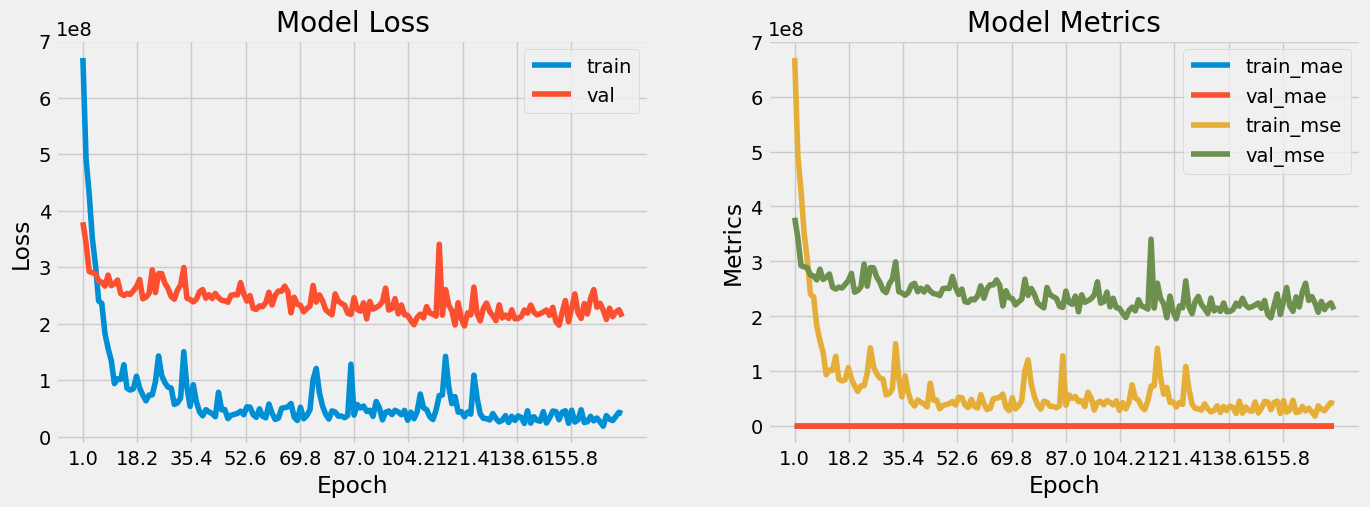

<Figure size 640x480 with 0 Axes>

In [84]:
# Tiếp theo ta plot các thông số loss và acc ra
def plot_model_history(his):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))   
    axs[0].plot(range(1, len(his['loss']) + 1), his['loss'])
    axs[0].plot(range(1, len(his['val_loss']) + 1), his['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, (len(his['loss']) + 1), len(his['loss']) / 10))
    axs[0].legend(['train', 'val'], loc='best')
    
    axs[1].plot(range(1, len(his['mean_absolute_error']) + 1), his['mean_absolute_error'])
    axs[1].plot(range(1, len(his['val_mean_absolute_error']) + 1), his['val_mean_absolute_error'])
    axs[1].plot(range(1, len(his['mean_squared_error']) + 1), his['mean_squared_error'])
    axs[1].plot(range(1, len(his['val_mean_squared_error']) + 1), his['val_mean_squared_error'])
    axs[1].set_title('Model Metrics')
    axs[1].set_ylabel('Metrics')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, (len(his['mean_absolute_error']) + 1), (len(his['mean_absolute_error']) / 10)))
    axs[1].legend(['train_mae', 'val_mae', 'train_mse', 'val_mse'], loc='best')
    
    plt.show()
    plt.savefig('roc.png')


plot_model_history(history_data)

In [89]:
# chạy thử mô hình với tập kiểm tra
hist=model.evaluate(X_test, y_test)

# Đánh giá hiệu suất mô hình trên tập kiểm tra
print("Mean Squared Error:", model.metrics[1].result().numpy())
print("Root Mean Squared Error:", model.metrics[2].result().numpy())
print("Mean Absolute Error:", model.metrics[3].result().numpy())

7/7 [==============================] - 0s 15ms/step - loss: 436140512.0000 - mean_squared_error: 436140512.0000 - root_mean_squared_error: 20883.9766 - mean_absolute_error: 11367.0693
Mean Squared Error: 436140500.0
Root Mean Squared Error: 20883.977
Mean Absolute Error: 11367.069


<a name='6'></a>
## 6 - Kết Luận

*   Hiện tại mô hình chưa thể hoàn thiện sau khi đã thực hiện nhiều cải tiến.
*   Cần thực hiện thêm cho việc chuẩn hóa dữ liệu cũng như tham khảo thêm về các trường dữ liệu để đánh giá đúng giá trị của một bất động sản.
*   Đây cũng là một bài toán thực tế của công việc hiện tại của em. Kinh mông thầy có thể góp ý tư vấn giúp em để cải thiện bài toán này. Cám ơn Thầy.


